In [1]:
import pandas as pd

# Step 1: Load the data
file_path = "D:/capstone/datasets/Affinity - State - Daily.xlsx"  
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Affinity - State - Daily')

In [2]:
# Step 2: Create a proper datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [3]:
# Step 3: Identify all spend-related columns
spend_columns = [col for col in df.columns if 'spend' in col]

In [4]:
# Step 4: Replace '.' with NaN (missing values)
df[spend_columns] = df[spend_columns].replace('.', pd.NA)

In [5]:
# Step 5: Convert all spend columns to numeric
df[spend_columns] = df[spend_columns].apply(pd.to_numeric, errors='coerce')

In [6]:
# Step 6: Interpolate missing values (best-performing imputation method)
# Interpolation first
df[spend_columns] = df[spend_columns].interpolate()
df

,year,month,day,statefips,freq,spend_all,spend_aap,spend_acf,spend_aer,spend_apg,...,spend_tws,spend_retail_w_grocery,spend_retail_no_grocery,spend_all_incmiddle,spend_all_q1,spend_all_q2,spend_all_q3,spend_all_q4,provisional,date
0,2018,12,31,1,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
1,2018,12,31,2,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
2,2018,12,31,4,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
3,2018,12,31,5,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
4,2018,12,31,6,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50689,2024,6,16,51,w,0.1730,-0.0325,0.0711,0.2960,0.313,...,-0.0743,0.196,0.188,0.174,0.227,0.1830,0.168,0.1650,1,2024-06-16
50690,2024,6,16,53,w,0.0631,-0.0721,-0.0210,-0.1030,0.250,...,-0.1630,0.101,0.079,0.099,-0.164,0.0909,0.102,0.0516,1,2024-06-16
50691,2024,6,16,54,w,0.3060,0.0297,0.2020,1.8500,0.660,...,0.6310,0.313,0.468,0.294,0.323,0.3440,0.259,0.2460,1,2024-06-16
50692,2024,6,16,55,w,0.1670,-0.1330,0.1060,0.0853,0.291,...,-0.1130,0.167,0.134,0.176,0.102,0.1860,0.166,0.1590,1,2024-06-16


In [7]:
# Then forward fill to handle start-of-series gaps
df[spend_columns] = df[spend_columns].fillna(method='ffill')
df

C:\Users\dheer\AppData\Local\Temp\ipykernel_15960\2770556637.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[spend_columns] = df[spend_columns].fillna(method='ffill')


,year,month,day,statefips,freq,spend_all,spend_aap,spend_acf,spend_aer,spend_apg,...,spend_tws,spend_retail_w_grocery,spend_retail_no_grocery,spend_all_incmiddle,spend_all_q1,spend_all_q2,spend_all_q3,spend_all_q4,provisional,date
0,2018,12,31,1,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
1,2018,12,31,2,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
2,2018,12,31,4,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
3,2018,12,31,5,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
4,2018,12,31,6,d,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50689,2024,6,16,51,w,0.1730,-0.0325,0.0711,0.2960,0.313,...,-0.0743,0.196,0.188,0.174,0.227,0.1830,0.168,0.1650,1,2024-06-16
50690,2024,6,16,53,w,0.0631,-0.0721,-0.0210,-0.1030,0.250,...,-0.1630,0.101,0.079,0.099,-0.164,0.0909,0.102,0.0516,1,2024-06-16
50691,2024,6,16,54,w,0.3060,0.0297,0.2020,1.8500,0.660,...,0.6310,0.313,0.468,0.294,0.323,0.3440,0.259,0.2460,1,2024-06-16
50692,2024,6,16,55,w,0.1670,-0.1330,0.1060,0.0853,0.291,...,-0.1130,0.167,0.134,0.176,0.102,0.1860,0.166,0.1590,1,2024-06-16


Interpolation fills most internal missing values smoothly by estimating between known values.

Forward Fill handles edge cases (like the beginning of the dataset) where interpolation alone fails due to lack of prior data.

In [9]:
# Check how many missing values are left in each column
missing_summary = df[spend_columns].isnull().sum()

# Print only columns that still have missing values
print(missing_summary[missing_summary > 0])


spend_all                  663
spend_aap                  663
spend_acf                  663
spend_aer                  663
spend_apg                  663
spend_durables             663
spend_nondurables          663
spend_grf                  663
spend_gen                  663
spend_hic                  663
spend_hcs                  663
spend_inperson             663
spend_inpersonmisc         663
spend_remoteservices       663
spend_sgh                  663
spend_tws                  663
spend_retail_w_grocery     663
spend_retail_no_grocery    663
spend_all_incmiddle        663
spend_all_q1               663
spend_all_q2               663
spend_all_q3               663
spend_all_q4               663
dtype: int64


In [10]:
# Preview cleaned data
print(df.head())

   year  month  day  statefips freq  spend_all  spend_aap  spend_acf  \
0  2018     12   31          1    d        NaN        NaN        NaN   
1  2018     12   31          2    d        NaN        NaN        NaN   
2  2018     12   31          4    d        NaN        NaN        NaN   
3  2018     12   31          5    d        NaN        NaN        NaN   
4  2018     12   31          6    d        NaN        NaN        NaN   

   spend_aer  spend_apg  ...  spend_tws  spend_retail_w_grocery  \
0        NaN        NaN  ...        NaN                     NaN   
1        NaN        NaN  ...        NaN                     NaN   
2        NaN        NaN  ...        NaN                     NaN   
3        NaN        NaN  ...        NaN                     NaN   
4        NaN        NaN  ...        NaN                     NaN   

   spend_retail_no_grocery  spend_all_incmiddle  spend_all_q1  spend_all_q2  \
0                      NaN                  NaN           NaN           NaN   
1     

In [11]:

# STEP 3: Drop rows where spend_all is missing (like 2018-12-31)
df = df.dropna(subset=['spend_all'])

In [12]:
# STEP 4: Group by date to create national daily average time series
df_timeseries = df.groupby('date')['spend_all'].mean().reset_index()

In [13]:
# STEP 5: Ensure daily continuity (fill missing dates)
df_timeseries = df_timeseries.set_index('date').asfreq('D').reset_index()

In [14]:
# STEP 6: Fill missing days using interpolation
df_timeseries['spend_all'] = df_timeseries['spend_all'].interpolate()

In [15]:
# Final 
print("Earliest valid date:", df_timeseries['date'].min())
print("Latest valid date:", df_timeseries['date'].max())
df_timeseries.head()

Earliest valid date: 2020-01-13 00:00:00
Latest valid date: 2024-06-16 00:00:00


,date,spend_all
0,2020-01-13,-0.011746
1,2020-01-14,-0.003922
2,2020-01-15,-0.000626
3,2020-01-16,-0.007516
4,2020-01-17,-0.018037


In [16]:
from statsmodels.tsa.stattools import adfuller

# ADF Test on spend_all
adf_result = adfuller(df_timeseries['spend_all'])

print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

# Interpretation
if adf_result[1] < 0.05:
    print("The time series is stationary. ARIMA can be applied directly.")
else:
    print("The time series is not stationary. Differencing is required.")


ADF Statistic: -1.4999256868900368
P-Value: 0.5335481002229714
Critical Values: {'1%': -3.434459072774668, '5%': -2.8633549134061376, '10%': -2.5677362247386295}
The time series is not stationary. Differencing is required.


In [17]:
# Step 1: Use auto_arima for optimal (p, d, q)
!pip install pmdarima

from pmdarima import auto_arima
ts = df_timeseries.set_index('date')['spend_all']

arima_model = auto_arima(ts, 
                         seasonal=False, 
                         stepwise=True, 
                         trace=True,
                         error_action='ignore', 
                         suppress_warnings=True)
print(arima_model.summary())


   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 653.6 kB/s eta 0:00:01
   --------------- ------------------------ 235.5/614.7 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 15.9 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 13.1 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.8 MB 12.9 MB/s eta 0:00:01
   ------------------------------- -------- 2.2/2.8 MB 12.6 MB/s eta 0:00:01
   -------------------------------------- - 2.7/2.8 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 10.4 MB/s eta 0:00:00
Perfor

In [18]:
# Step 2: Forecast next 30 days
n_periods = 30
arima_forecast = arima_model.predict(n_periods=n_periods)

# Step 3: Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual_arima = df_timeseries['spend_all'][-30:].values

mae_arima = mean_absolute_error(actual_arima, arima_forecast)
mse_arima = mean_squared_error(actual_arima, arima_forecast)
rmse_arima = np.sqrt(mse_arima)

print(f"ARIMA MAE: {mae_arima:.4f}")
print(f"ARIMA MSE: {mse_arima:.6f}")
print(f"ARIMA RMSE: {rmse_arima:.4f}")


ARIMA MAE: 0.0047
ARIMA MSE: 0.000029
ARIMA RMSE: 0.0054


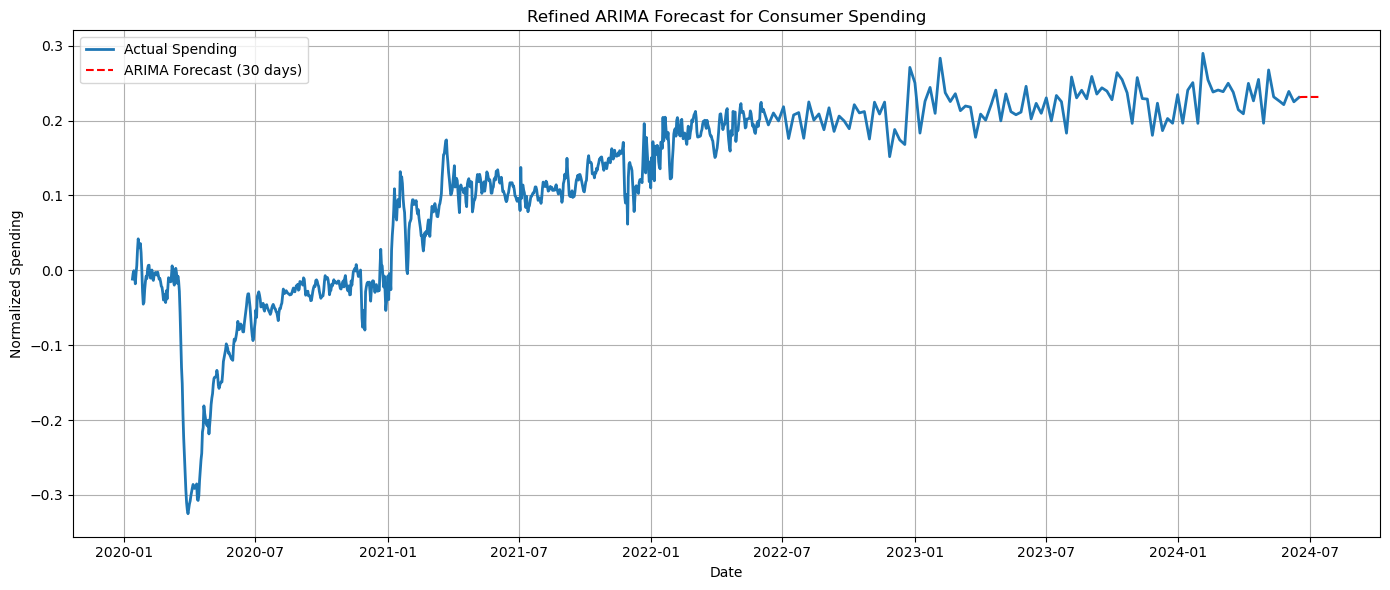

In [19]:
# Step 4: Plot
import matplotlib.pyplot as plt
forecast_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(14,6))
plt.plot(df_timeseries['date'], df_timeseries['spend_all'], label='Actual Spending', linewidth=2)
plt.plot(forecast_dates, arima_forecast, label='ARIMA Forecast (30 days)', linestyle='--', color='red')
plt.title("Refined ARIMA Forecast for Consumer Spending")
plt.xlabel("Date")
plt.ylabel("Normalized Spending")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# PROPHET

In [21]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [22]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Data
prophet_df = df_timeseries.rename(columns={'date': 'ds', 'spend_all': 'y'})

In [23]:
# Step 2: Fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

16:11:07 - cmdstanpy - INFO - Chain [1] start processing
16:11:08 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Step 3: Forecast next 30 days
future = prophet_model.make_future_dataframe(periods=30)
forecast_prophet = prophet_model.predict(future)

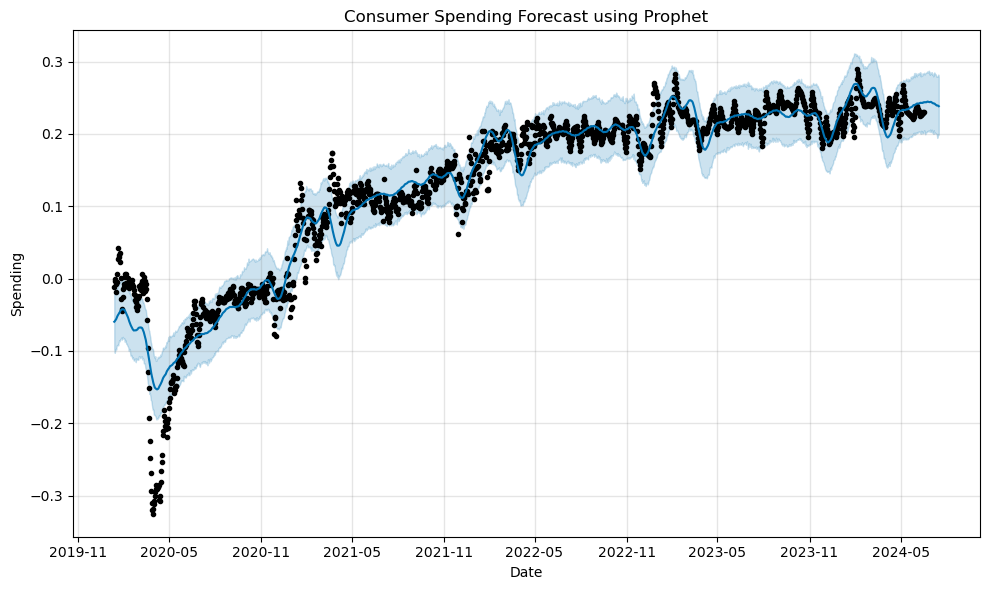

In [25]:
# Step 4: Plot forecast
prophet_model.plot(forecast_prophet)
plt.title("Consumer Spending Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Spending")
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 5: Prophet evaluation (compare last 30 actuals to predicted)
actual_30 = df_timeseries['spend_all'][-30:].values
predicted_30 = forecast_prophet['yhat'][-30:].values

# Compute metrics
mae_prophet = mean_absolute_error(actual_30, predicted_30)
mse_prophet = mean_squared_error(actual_30, predicted_30)
rmse_prophet = np.sqrt(mse_prophet)

print(f"Prophet MAE: {mae_prophet:.4f}")
print(f"Prophet MSE: {mse_prophet:.6f}")
print(f"Prophet RMSE: {rmse_prophet:.4f}")


Prophet MAE: 0.0140
Prophet MSE: 0.000223
Prophet RMSE: 0.0149


# LSTM

In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [29]:
# Extract spend_all as a NumPy array
data = df_timeseries['spend_all'].values.reshape(-1, 1)

# Normalize the data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences (30 days -> 1 day prediction)
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create X and y
X, y = create_sequences(scaled_data)

# Print shapes
print("Input shape:", X.shape)
print("Target shape:", y.shape)


Input shape: (1587, 30, 1)
Target shape: (1587, 1)


In [30]:
# Split into train and test sets
train_size = len(X) - 30  # last 30 for testing
X_train, y_train = X[:train_size], y[:train_size]
X_test = X[train_size:]

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (1557, 30, 1)
Test set shape: (30, 30, 1)


In [31]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(30, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)


Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1340
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7361e-04
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011
Epoch 9/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012
Epoch 10/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011
Epoch 11/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.6372e-04
Epoch 12/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011
Epoch 13/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7357e-04
Epoch 14/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8440e-04
Epoch 15/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7173e-04
Epoch 16/2

In [32]:
# Predict next 30 days using last 30 sequences
predictions_scaled = model.predict(X_test)

# Inverse scale to get original values
predictions = scaler.inverse_transform(predictions_scaled)

# Create forecast date range
forecast_dates_lstm = pd.date_range(df_timeseries['date'].iloc[-1], periods=31, freq='D')[1:]

# Create a DataFrame for visualization
lstm_forecast_df = pd.DataFrame({
    'Date': forecast_dates_lstm,
    'LSTM_Forecast': predictions.flatten()
})

# Preview
lstm_forecast_df.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


,Date,LSTM_Forecast
0,2024-06-17,0.234523
1,2024-06-18,0.233820
2,2024-06-19,0.233211
3,2024-06-20,0.232601
4,2024-06-21,0.231957


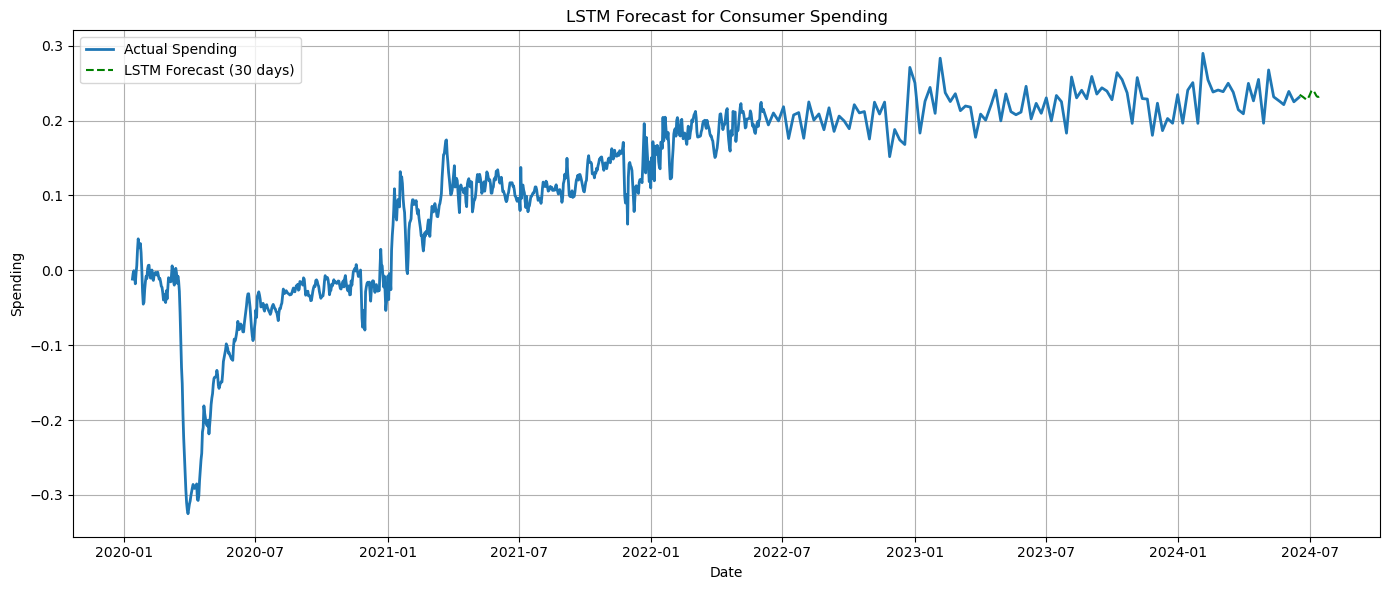

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_timeseries['date'], df_timeseries['spend_all'], label='Actual Spending', linewidth=2)
plt.plot(lstm_forecast_df['Date'], lstm_forecast_df['LSTM_Forecast'], label='LSTM Forecast (30 days)', linestyle='--', color='green')
plt.title("LSTM Forecast for Consumer Spending")
plt.xlabel("Date")
plt.ylabel("Spending")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Transformer

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Add


In [36]:
# Use the same scaled data as before
sequence_length = 30

# Reuse the create_sequences function
def create_transformer_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Generate sequences
X_transformer, y_transformer = create_transformer_sequences(scaled_data)

# Use last 30 sequences for forecasting
X_train_tf = X_transformer[:-30]
y_train_tf = y_transformer[:-30]
X_test_tf = X_transformer[-30:]

# Confirm shapes
print("Transformer Train Input Shape:", X_train_tf.shape)
print("Transformer Test Input Shape:", X_test_tf.shape)


Transformer Train Input Shape: (1557, 30, 1)
Transformer Test Input Shape: (30, 30, 1)


In [37]:
# Define Transformer block
def transformer_block(inputs, num_heads=4, ff_dim=64, dropout=0.1):
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention_output = Dropout(dropout)(attention_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([inputs, attention_output]))

    ffn_output = Dense(ff_dim, activation='relu')(out1)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)

    return LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))

# Define the full model
input_layer = Input(shape=(sequence_length, 1))
x = transformer_block(input_layer)
x = GlobalAveragePooling1D()(x)
x = Dense(1)(x)

transformer_model = Model(inputs=input_layer, outputs=x)

# Compile
transformer_model.compile(optimizer='adam', loss='mse')

# Summary
transformer_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 30, 1)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (None, 30, 1)             │              29 │ input_layer_1[0][0],       │
│ (MultiHeadAttention)          │                           │                 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 30, 1)             │               0 │ multi_head_attention[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 30, 1)             │               0 │ input_layer_1[0][0],       │
│                               │                           │                 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 30, 1)             │               2 │ add[0][0]                  │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 30, 64)            │             128 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 30, 1)             │              65 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 30, 1)             │               0 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 30, 1)             │               0 │ layer_normalization[0][0], │
│                               │                           │                 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_1         │ (None, 30, 1)             │               2 │ add_1[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 1)                 │               0 │ layer_normalization_1[0][… │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 1)                 │               2 │ global_average_pooling1d[… │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the Transformer
history_tf = transformer_model.fit(
    X_train_tf, y_train_tf,
    epochs=20,
    batch_size=16,
    verbose=1
)


Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5148
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2820
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1396
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0683
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0422
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0387
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0370
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383
Epoch 9/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0368
Epoch 10/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0403
Epoch 11/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0372
Epoch 12/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380
Epoch 13/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0386
Epoch 14/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0352
Epoch 15/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0405
Epoch 16/20
98/98 ━

In [39]:
# Predict using Transformer
predictions_tf_scaled = transformer_model.predict(X_test_tf)

# Inverse transform to original scale
predictions_tf = scaler.inverse_transform(predictions_tf_scaled)

# Build forecast DataFrame
forecast_dates_tf = pd.date_range(df_timeseries['date'].iloc[-1], periods=31, freq='D')[1:]
transformer_forecast_df = pd.DataFrame({
    'Date': forecast_dates_tf,
    'Transformer_Forecast': predictions_tf.flatten()
})

# Preview
transformer_forecast_df.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


,Date,Transformer_Forecast
0,2024-06-17,0.128806
1,2024-06-18,0.128806
2,2024-06-19,0.128806
3,2024-06-20,0.128806
4,2024-06-21,0.128806


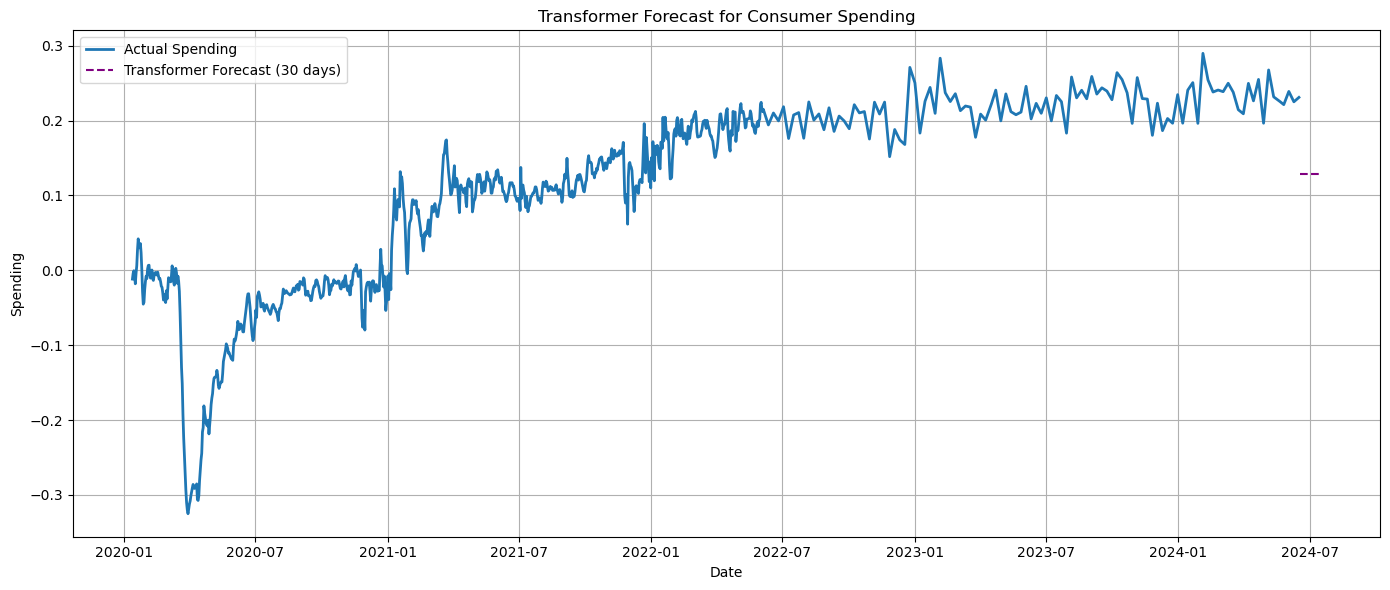

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(df_timeseries['date'], df_timeseries['spend_all'], label='Actual Spending', linewidth=2)
plt.plot(transformer_forecast_df['Date'], transformer_forecast_df['Transformer_Forecast'],
         label='Transformer Forecast (30 days)', linestyle='--', color='purple')
plt.title("Transformer Forecast for Consumer Spending")
plt.xlabel("Date")
plt.ylabel("Spending")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## sample comparisiom

In [42]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the series again
data = df_timeseries['spend_all'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence function
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
X, y = create_sequences(scaled_data)
X_train, y_train = X[:-30], y[:-30]
X_test = X[-30:]

# Rebuild and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=False, input_shape=(30, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

# Predict and inverse transform
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Evaluate
true_lstm = df_timeseries['spend_all'][-30:].values
pred_lstm = lstm_forecast.flatten()
mae_lstm = mean_absolute_error(true_lstm, pred_lstm)
rmse_lstm = mean_squared_error(true_lstm, pred_lstm, squared=False)

print(f"LSTM MAE: {mae_lstm:.6f}")
print(f"LSTM RMSE: {rmse_lstm:.6f}")


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
LSTM MAE: 0.002453
LSTM RMSE: 0.003003


In [43]:
# Get last 30 actual values
true_tf = df_timeseries['spend_all'][-30:].values

# Use Transformer predictions (ensure this exists: predictions_tf)
pred_tf = predictions_tf.flatten()

# Metrics
mae_tf = mean_absolute_error(true_tf, pred_tf)
rmse_tf = mean_squared_error(true_tf, pred_tf, squared=False)

print(f"Transformer MAE: {mae_tf:.6f}")
print(f"Transformer RMSE: {rmse_tf:.6f}")


Transformer MAE: 0.099691
Transformer RMSE: 0.099791
